# RNNs

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, LSTM, GRU, Dropout
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

# Load IMDB dataset
max_features = 10000
max_len = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Number of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (25000,)
Testing data shape: (25000,)
Number of training samples: 25000
Number of testing samples: 25000


In [3]:
word_index = imdb.get_word_index()

def decode_review(encoded_review):
    reverse_word_index = {value + 3: key for key, value in word_index.items()}
    reverse_word_index[0] = '<PAD>'
    reverse_word_index[1] = '<START>'
    reverse_word_index[2] = '<UNK>'
    reverse_word_index[3] = '<UNUSED>'

    return ' '.join([reverse_word_index.get(i, '?') for i in encoded_review])


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
negative_example = 21505
positive_example = 10
print("\nPositive review:")
print(decode_review(X_train[positive_example]))
print(f"Label: {'Positive' if y_train[positive_example] == 1 else 'Negative'}")

print("\nNegative review:")
print(decode_review(X_train[negative_example]))
print(f"Label: {'Positive' if y_train[negative_example] == 1 else 'Negative'}")


Positive review:
<START> french horror cinema has seen something of a revival over the last couple of years with great films such as inside and <UNK> romance <UNK> on to the scene <UNK> <UNK> the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made <UNK> was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is <UNK> by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named <UNK> sent to prison for fraud he is put in a cell with three others the quietly insane <UNK> body building <UNK> marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old <UNK> after <UNK> part of it they soon realise its magical powers and realise they may 

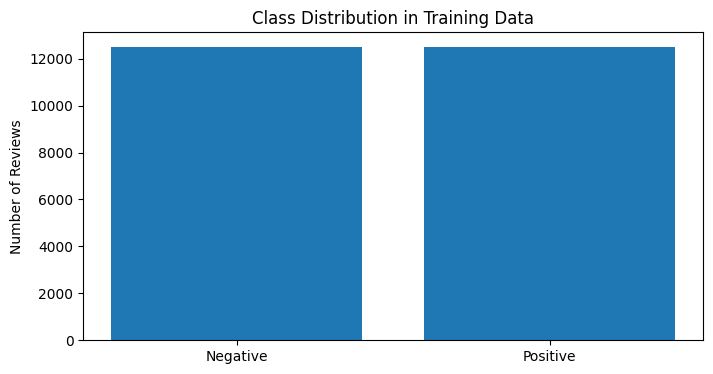

In [5]:
# Uniformization
X_train_pad = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test, maxlen=max_len, padding='post', truncating='post')


# Let's examine the distribution of positive and negative reviews
plt.figure(figsize=(8, 4))
plt.bar(['Negative', 'Positive'], [sum(y_train == 0), sum(y_train == 1)])
plt.title('Class Distribution in Training Data')
plt.ylabel('Number of Reviews')
plt.show()

In [15]:
## Build and Train RNN Model
def build_rnn_model():
    print("\nBuilding and training RNN model...")
    model = Sequential([
        Embedding(max_features, 128, input_length=max_len),
        SimpleRNN(64, return_sequences=True),
        SimpleRNN(32),
        Dense(16, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.summary()

    history = model.fit(
        X_train_pad, y_train,
        epochs=20,
        batch_size=128,
        validation_split=0.2,
        verbose=1
    )

    return model, history

rnn_model, rnn_history = build_rnn_model()


Building and training RNN model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.4964 - loss: 0.7008 - val_accuracy: 0.4946 - val_loss: 0.6933
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.5113 - loss: 0.6900 - val_accuracy: 0.5012 - val_loss: 0.6934
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.5560 - loss: 0.6617 - val_accuracy: 0.5116 - val_loss: 0.6929
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.6199 - loss: 0.6019 - val_accuracy: 0.5074 - val_loss: 0.6971
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.6530 - loss: 0.5427 - val_accuracy: 0.5114 - val_loss: 0.6940
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.6956 - loss: 0.4911 - val_accuracy: 0.5090 - val_loss: 0.7405
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.7068 - loss: 0.4615 - val_accuracy: 0.5096 - val_loss: 0.8235
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.7143 - loss: 0.4375 - val_

In [7]:
## Build and Train LSTM Model

def build_lstm_model():
    print("\nBuilding and training LSTM model...")
    model = Sequential([
        Embedding(max_features, 128, input_length=max_len),
        LSTM(64, return_sequences=True),
        LSTM(32),
        Dense(16, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.summary()

    history = model.fit(
        X_train_pad, y_train,
        epochs=20,
        batch_size=128,
        validation_split=0.2,
        verbose=1
    )

    return model, history

lstm_model, lstm_history = build_lstm_model()


Building and training LSTM model...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.5211 - loss: 0.6909 - val_accuracy: 0.5888 - val_loss: 0.6718
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.5705 - loss: 0.6713 - val_accuracy: 0.5444 - val_loss: 0.6802
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5457 - loss: 0.6902 - val_accuracy: 0.5828 - val_loss: 0.6532
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6187 - loss: 0.6400 - val_accuracy: 0.7124 - val_loss: 0.5951
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.6899 - loss: 0.6043 - val_accuracy: 0.7686 - val_loss: 0.5371
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7225 - loss: 0.5745 - val_accuracy: 0.4934 - val_loss: 0.6911
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5071 - loss: 0.6913 - val_accuracy: 0.5122 - val_loss: 0.6958
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5937 - loss: 0.6521 - val_acc

In [8]:
## Build and Train GRU Model

def build_gru_model():
    print("\nBuilding and training GRU model...")
    model = Sequential([
        Embedding(max_features, 128, input_length=max_len),
        GRU(64, return_sequences=True),
        GRU(32),
        Dense(16, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.summary()

    history = model.fit(
        X_train_pad, y_train,
        epochs=20,
        batch_size=128,
        validation_split=0.2,
        verbose=1
    )

    return model, history

gru_model, gru_history = build_gru_model()


Building and training GRU model...


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.5052 - loss: 0.6935 - val_accuracy: 0.5390 - val_loss: 0.6867
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.5594 - loss: 0.6753 - val_accuracy: 0.5574 - val_loss: 0.6812
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.6255 - loss: 0.6065 - val_accuracy: 0.7204 - val_loss: 0.5929
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8083 - loss: 0.4524 - val_accuracy: 0.8376 - val_loss: 0.3798
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8995 - loss: 0.2646 - val_accuracy: 0.8112 - val_loss: 0.5248
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9206 - loss: 0.2051 - val_accuracy: 0.8392 - val_loss: 0.4899
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9445 - loss: 0.1625 - val_accuracy: 0.8420 - val_loss: 0.5522
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9645 - loss: 0.1131 - val_accu


Evaluating RNN model:
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step
Test Accuracy: 0.5087
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.29      0.37     12500
           1       0.51      0.73      0.60     12500

    accuracy                           0.51     25000
   macro avg       0.51      0.51      0.48     25000
weighted avg       0.51      0.51      0.48     25000



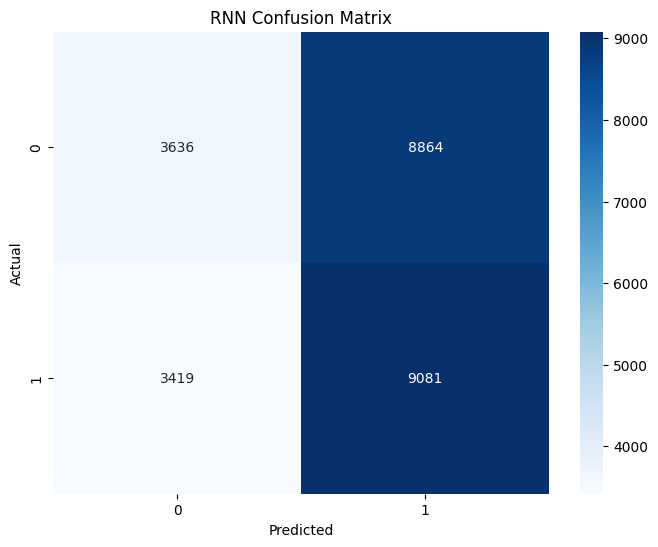


Evaluating LSTM model:
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step
Test Accuracy: 0.8378
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     12500
           1       0.85      0.82      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



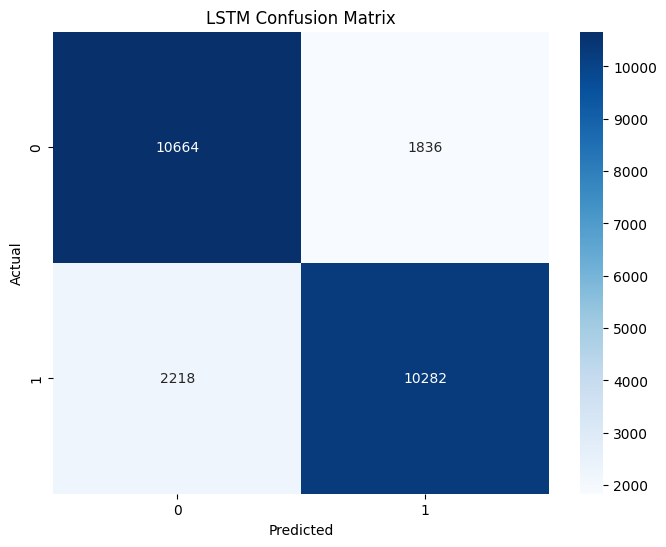


Evaluating GRU model:
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step
Test Accuracy: 0.8095
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.82     12500
           1       0.84      0.76      0.80     12500

    accuracy                           0.81     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.81      0.81      0.81     25000



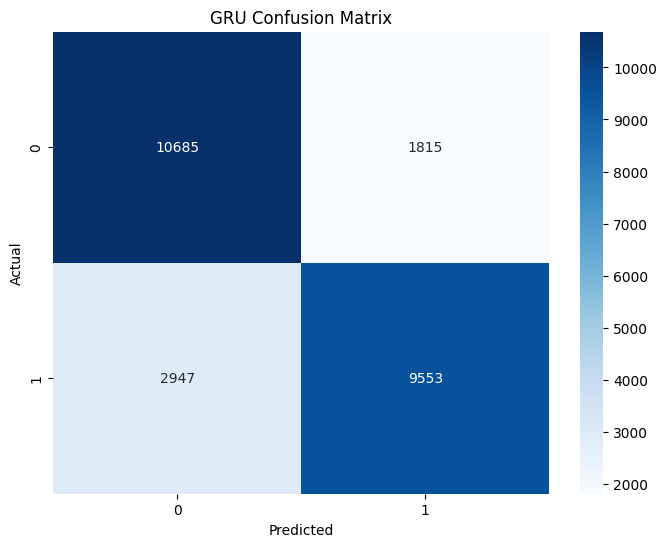

In [16]:
## Model Evaluation

def evaluate_model(model, model_name):
    print(f"\nEvaluating {model_name} model:")
    loss, accuracy = model.evaluate(X_test_pad, y_test, verbose=0)
    y_pred = (model.predict(X_test_pad) > 0.5).astype(int)

    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return accuracy, y_pred

rnn_accuracy, rnn_preds = evaluate_model(rnn_model, "RNN")
lstm_accuracy, lstm_preds = evaluate_model(lstm_model, "LSTM")
gru_accuracy, gru_preds = evaluate_model(gru_model, "GRU")

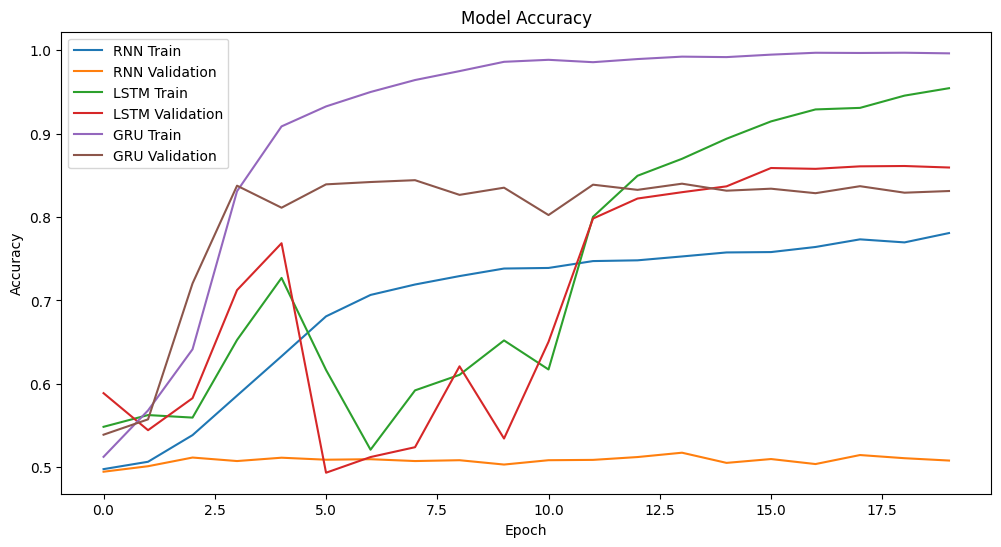

In [21]:
## Visualize Training Histories

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(rnn_history.history['accuracy'], label='RNN Train')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation')
plt.plot(lstm_history.history['accuracy'], label='LSTM Train')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation')
plt.plot(gru_history.history['accuracy'], label='GRU Train')
plt.plot(gru_history.history['val_accuracy'], label='GRU Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

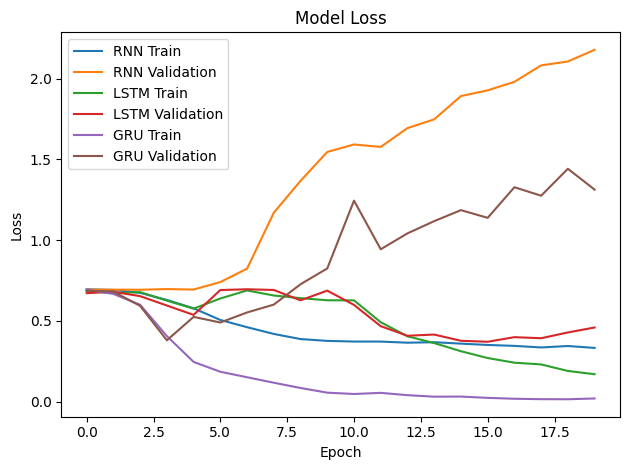

In [22]:
# Plot training and validation loss
plt.plot(rnn_history.history['loss'], label='RNN Train')
plt.plot(rnn_history.history['val_loss'], label='RNN Validation')
plt.plot(lstm_history.history['loss'], label='LSTM Train')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation')
plt.plot(gru_history.history['loss'], label='GRU Train')
plt.plot(gru_history.history['val_loss'], label='GRU Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()

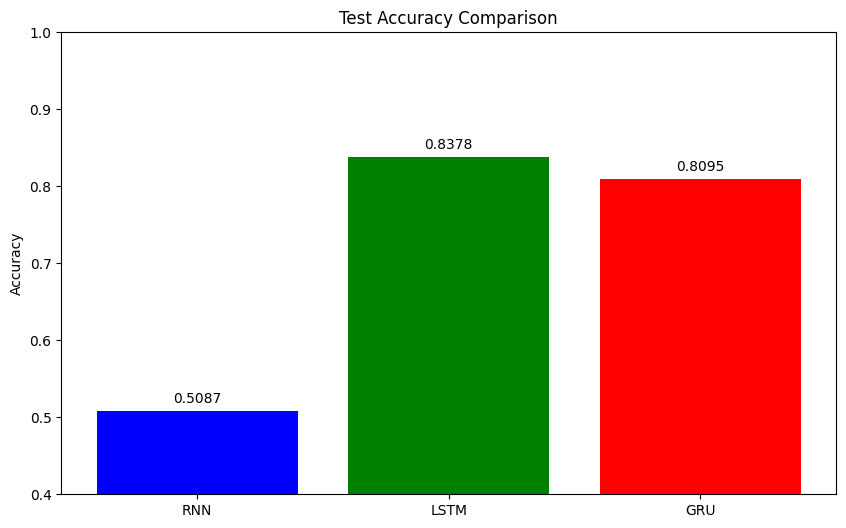

In [23]:
## Model Comparison

models = ['RNN', 'LSTM', 'GRU']
accuracies = [rnn_accuracy, lstm_accuracy, gru_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.4, 1.0)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center')
plt.show()

In [13]:
## Example Predictions

def predict_sentiment(text, model):
    words = text.lower().split()
    indices = []
    for word in words:
        if word in word_index and word_index[word] < max_features:
            indices.append(word_index[word] + 3)
        else:
            indices.append(2)

    if len(indices) > max_len:
        indices = indices[:max_len]
    else:
        indices = [0] * (max_len - len(indices)) + indices

    # Make prediction
    prediction = model.predict(np.array([indices]))[0][0]
    return prediction, "Positive" if prediction > 0.5 else "Negative"

In [14]:
# Test with example reviews
example_texts = [
    "This movie was absolutely amazing! I loved every minute of it and would highly recommend it to anyone looking for a great film.",
    "I hated this film. The acting was terrible and the plot made no sense. Complete waste of time and money."
]

for text in example_texts:
    score, sentiment = predict_sentiment(text, lstm_model)
    print(f"Text: {text}")
    print(f"Sentiment: {sentiment} (Score: {score:.4f})")
    print("-" * 50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
Text: This movie was absolutely amazing! I loved every minute of it and would highly recommend it to anyone looking for a great film.
Sentiment: Positive (Score: 0.9407)
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Text: I hated this film. The acting was terrible and the plot made no sense. Complete waste of time and money.
Sentiment: Negative (Score: 0.0028)
--------------------------------------------------
